In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

np.seterr(all='ignore')
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [2]:
startyear,endyear = 1956,2013

[-74.2321  -74.20485 -74.17755 -74.1502 ]


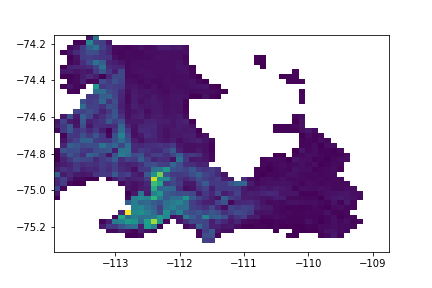

In [5]:
timep= slice(f"{startyear}-1-1",f"{endyear}-12-31")
ds = xr.open_dataset('../../../data/paulholland/melt.nc')
ds = ds.sel(LONGITUDE=slice(360-114,360-108.7),LATITUDE=slice(-75.3,-74.1),TIME=timep)
ds = ds.mean(dim='TIME')
lon   = (ds.LONGITUDE-360.).values
lat   = (ds.LATITUDE-.05).values
melt = ds.melt.values

plt.pcolormesh(lon,lat,np.where(melt==0,np.nan,melt))
print(lat[-4:])

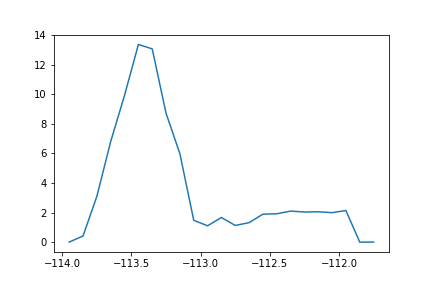

In [16]:
timep= slice(f"{startyear}-1-1",f"{endyear}-12-31")
ds = xr.open_dataset('../../../data/paulholland/melt.nc')
ds = ds.sel(LONGITUDE=slice(360-114,360-111.7),LATITUDE=slice(-74.21,-74.19),TIME=timep)
lon   = (ds.LONGITUDE-360.).values
lat   = (ds.LATITUDE-.05).values
ds = ds.mean(dim=['TIME','LATITUDE'])
melt = ds.melt.values

plt.plot(lon,melt)

In [9]:
#MITgcm

timep= slice(f"{startyear}-1-1",f"{endyear}-12-31")
ds = xr.open_dataset('../../../data/paulholland/PAS_851/stateSalt.nc')
ds = ds.sel(LONGITUDE=slice(360-114,360-111.7),LATITUDE=slice(-74.21,-74.19),TIME=timep,DEPTH=slice(0,2000))
ds = ds.mean(dim=['TIME','LATITUDE'])
lon   = (ds.LONGITUDE-360.).values
#lat   = (ds.LATITUDE-.05).values
dep = -ds.DEPTH.values
salt = ds.SALT.values
salt = np.where(salt==0,np.nan,salt)

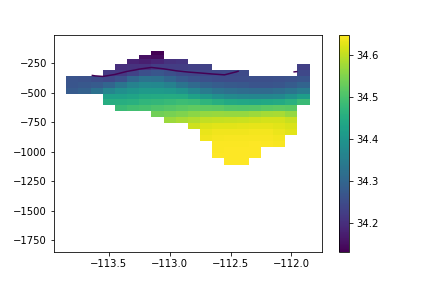

In [24]:
plt.contour(lon,dep,salt,levels=[34.25,38],c='k',zorder=10)
plt.pcolormesh(lon,dep,salt)
plt.colorbar()

In [22]:
timep= slice(f"{startyear}-1-1",f"{endyear}-12-31")
ds = xr.open_dataset('../../../data/paulholland/PAS_851/stateTheta.nc')
ds = ds.sel(LONGITUDE=slice(360-114,360-111.7),LATITUDE=slice(-74.21,-74.19),TIME=timep,DEPTH=slice(0,2000))
ds = ds.mean(dim=['TIME','LATITUDE'])
lon   = (ds.LONGITUDE-360.).values
#lat   = (ds.LATITUDE-.05).values
dep = -ds.DEPTH.values
temp = ds.THETA.values
temp = np.where(temp==0,np.nan,temp)

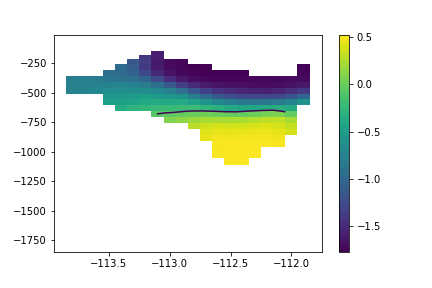

In [23]:
plt.contour(lon,dep,temp,levels=[0,1],c='k',zorder=10)
plt.pcolormesh(lon,dep,temp)
plt.colorbar()